In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the Data
The data for the analysis was obtained from the Kaggle: https://www.kaggle.com/airbnb/seattle/data

The data is broken into 3 datasets:
 - Listings - includes full descriptions and average review score
 - Reviews - includes unique id for each reviewer and detailed comments
 - Calendar - includes listing id and the price and availability for that day

In [149]:
df_reviews = pd.read_csv ("data/reviews.csv")
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [150]:
df_listings = pd.read_csv ("data/listings.csv")
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [151]:
df_calendar= pd.read_csv ("data/calendar.csv")
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [152]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [153]:
# Convert date from string to datetime
df_calendar.date = pd.to_datetime(df_calendar.date)
# Create a feature for the month of the date field
df_calendar ["month"] = pd.DatetimeIndex(df_calendar.date).month

## Explore Date Ranges
 - Examine the earliest date in the dataset
 - Examine the latest date in the dataset
 - Calculate the number of days in the dataset

In [154]:
df_calendar.date.min()

Timestamp('2016-01-04 00:00:00')

In [155]:
df_calendar.date.max()

Timestamp('2017-01-02 00:00:00')

In [156]:
num_days_in_dataset = (df_calendar.date.max()-df_calendar.date.min()).days
num_days_in_dataset

364

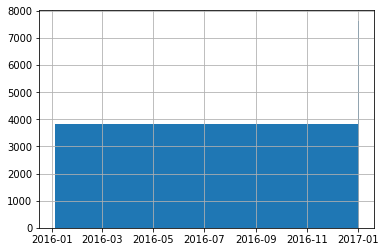

In [157]:
#View the number of listings
df_calendar.date.hist(bins=num_days_in_dataset);

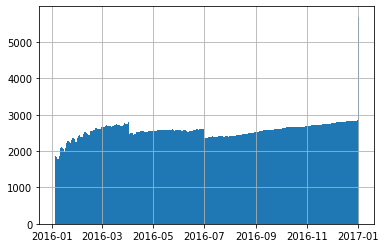

In [158]:
#View the number of listings that are available
df_calendar.query("available=='t'").date.hist(bins=num_days_in_dataset);

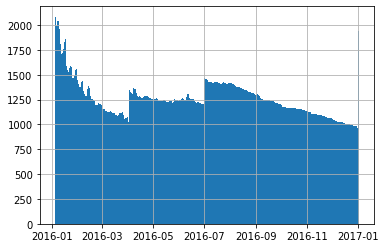

In [159]:
#View number of listings that are not available
df_calendar.query("available=='f'").date.hist(bins=num_days_in_dataset);

In [160]:
#Calculate percentage of data with no price
df_calendar.price.count()/(df_calendar.price.isna().sum() + df_calendar.price.count()) * 100

67.06100160020667

In [161]:
# Drop rows with no price data
df_calendar = df_calendar.dropna()

In [162]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  object        
 4   month       934542 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 42.8+ MB


In [163]:
df_calendar.price.str[1:].replace (",","")

0          85.00
1          85.00
9          85.00
10         85.00
14         85.00
           ...  
1393207    87.00
1393208    87.00
1393211    87.00
1393212    87.00
1393213    87.00
Name: price, Length: 934542, dtype: object

In [164]:
df_calendar["price_numerical"] = df_calendar.price.str[1:].str.replace (",","").astype(float)

In [165]:
df_calendar.describe()

,listing_id,month,price_numerical
count,9.345420e+05,934542.000000,934542.000000
mean,5.305517e+06,6.661120,137.944859
std,2.974821e+06,3.446401,105.062870
min,3.335000e+03,1.000000,10.000000
25%,2.875975e+06,4.000000,75.000000
50%,5.615620e+06,7.000000,109.000000
75%,7.873345e+06,10.000000,160.000000
max,1.034016e+07,12.000000,1650.000000


## Explore the data

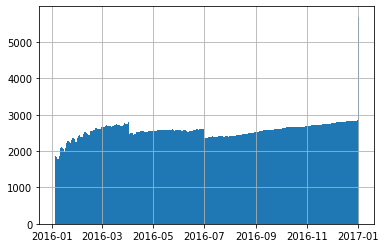

In [166]:
#View number of daily listings
df_calendar.date.hist(bins=num_days_in_dataset);

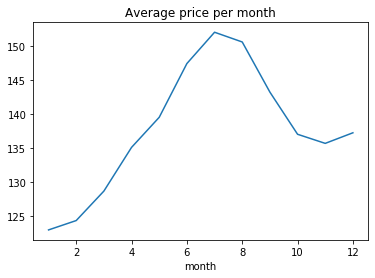

In [176]:
# View average price per month
df_calendar.groupby("month").price_numerical.mean().plot(title="Average price per month");

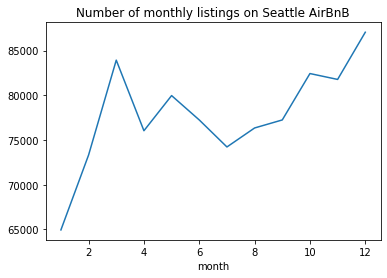

In [168]:
df_calendar.groupby("month").count().price.plot(title = "Number of monthly listings on Seattle AirBnB");

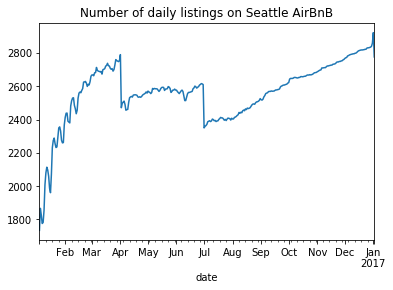

In [169]:
df_calendar.groupby("date").count().price.plot(title = "Number of daily listings on Seattle AirBnB");

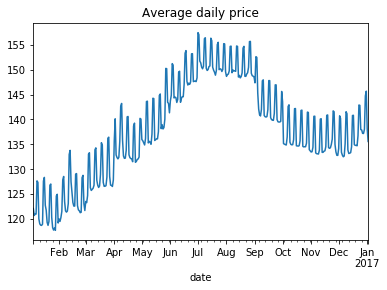

In [177]:

df_calendar.groupby("date").price_numerical.mean().plot(title = ("Average daily price"));

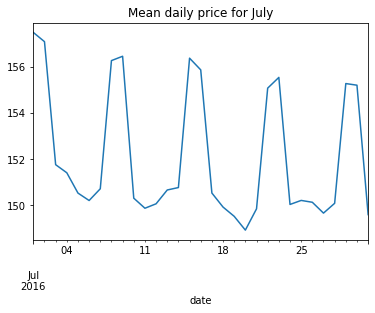

In [171]:
df_calendar.query("month==7").groupby("date").price_numerical.mean().plot(title = ("Mean daily price for July"));

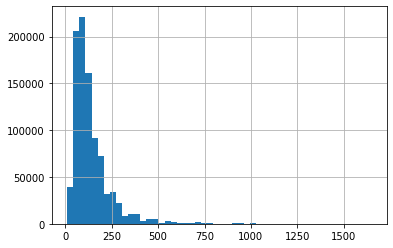

In [172]:
#View price breakdowns
df_calendar.price_numerical.hist(bins=50);

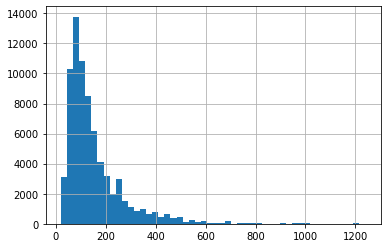

In [173]:
#View price breakdowns for July
df_calendar.query("month==7").price_numerical.hist(bins=50);

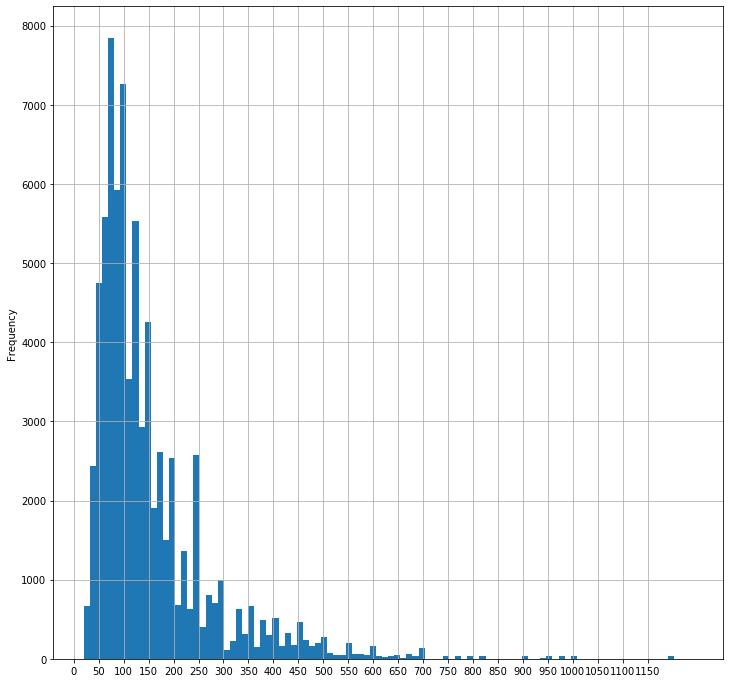

In [174]:
#View price breakdowns for July
df_calendar.query("month==7").price_numerical.plot(kind="hist", bins=100, xticks = np.arange(0, 1200, step=50), figsize = (12,12), grid = True);


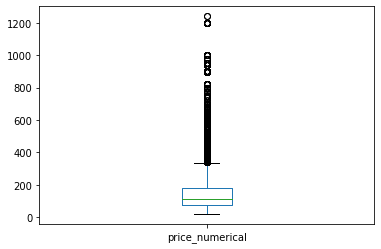

In [175]:
#View price breakdowns
df_calendar.query("month==7").price_numerical.plot(kind="box");

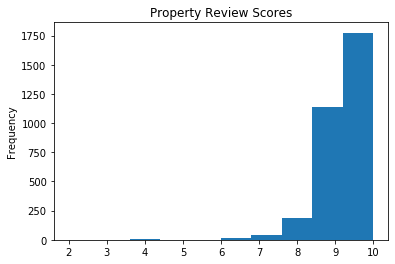

In [183]:
# View the breakdown of property review scores
df_listings.review_scores_value.plot(kind="hist", title = "Property Review Scores");